# Cite later!!!

Source: Tanisha Harde on Kaggle
https://www.kaggle.com/code/tanishaharde/e-commerce-shopper-purchase-prediction-analysis/notebook


> ## **<center>Problem Statement:</center>** 
>   Marketing teams constantly strive to optimize their promotions, pricing, 
personalization, and campaigns to increase customer acquisition, retention, and 
revenue. However, identifying the most effective strategies can be challenging. 
Machine learning algorithms can be used to analyze past customer behavior and 
predict future outcomes based on various marketing strategies.

>The aim of this project is **to develop a machine learning model that can predict whether a customer visiting an online shopping website will make a purchase or not. This prediction can help marketing teams in optimizing their promotions, pricing, personalization, and campaigns to increase the likelihood of purchase and ultimately, revenue.**
***

## **<center> Justification and Source of Dataset :  </center>** 

>The "Online Shoppers Purchasing Intention Dataset" from UCI Machine Learning 
Repository is a suitable dataset for this problem statement. This dataset contains various features related to user behavior on an online shopping website, such as the number of pages visited, the duration of the visit, and the type of traffic source. The dataset also includes a binary label indicating whether the user made a purchase or not.

>This dataset is suitable for solving this problem because it provides insights into 
various factors that influence the purchasing decision of users on an online 
shopping website. By analyzing this data, machine learning models can learn to 
identify the most effective marketing strategies for increasing the likelihood of purchase



### Importing libraries and files : ###

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

%matplotlib inline


In [2]:
df=pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
len(df.columns)

18

>The decision to drop certain columns from the dataset depends on the specific analysis goals and the relevance of each column to those goals. 

>In this case, I decided to drop the 'Administrative', 'Informational', and 'ProductRelated' columns because they represent the number of pages visited by the user in each of these categories, and the total number of pages visited is already captured by the 'PageValues' column. Therefore, these columns were considered redundant and not useful for the analysis. 

In [7]:
df = df.drop(['Administrative', 'Informational', 'ProductRelated'], axis=1)

In [8]:
len(df.columns)

15

>In the dataset, there are some columns with categorical variables, such as 'Month', 'VisitorType', 'OperatingSystem', and 'Browser'.

>Machine learning algorithms generally require numerical inputs, so we need to convert these categorical variables into numerical format.

>**Label encoding** and **one-hot encoding** are two techniques to achieve this conversion

>**Label encoding** assigns a unique numerical value to each category of a variable. For example, for the 'Month' column, we can assign a numerical value of 1 for January, 2 for February, and so on. Label encoding is suitable for categorical variables that have a natural ordering, such as 'Month' and 'VisitorType'.

>One-hot encoding, on the other hand, creates a new binary column for each category of a variable. 


<div class="alert alert-block alert-info">
<b>Note:</b> Here, we will be using <b>Label encoding </b>             
</div>

In [9]:
from sklearn.preprocessing import LabelEncoder

We have imported LabelEncoding above

In [10]:
categorical_columns=['Weekend','Revenue']
for col in categorical_columns:
    encoder = LabelEncoder()
    encoder.fit(df[col])
    print('Column:', col)
    print('Original categories:', encoder.classes_)
    print('Encoded values:', encoder.transform(encoder.classes_))
    print('\n')
    df[col] = encoder.fit_transform(df[col])


Column: Weekend
Original categories: [False  True]
Encoded values: [0 1]


Column: Revenue
Original categories: [False  True]
Encoded values: [0 1]




In [12]:
df.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,Returning_Visitor,0,0
1,0.0,0.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,Returning_Visitor,0,0
2,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,Returning_Visitor,0,0
3,0.0,0.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,Returning_Visitor,0,0
4,0.0,0.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,Returning_Visitor,1,0


Next, let's explore the duplicated data.

In [13]:
df.duplicated().value_counts()  #to see the count of duplicated rows

False    12157
True       173
Name: count, dtype: int64

<div class="alert alert-block alert-info">
<b>Note:</b> <b> False:</b> implies number of rows without any duplicates.<br>
           <b> True:</b> implies number of rows with duplicates
</div>

### Now, we will see the duplicated rows: 

In [14]:
# Use the `duplicated` function to identify duplicated rows
duplicated_rows = df[df.duplicated()]

# Print the duplicated rows
print(duplicated_rows)

       Administrative_Duration  Informational_Duration  \
158                        0.0                     0.0   
159                        0.0                     0.0   
178                        0.0                     0.0   
330                        0.0                     0.0   
356                        0.0                     0.0   
...                        ...                     ...   
11939                      0.0                     0.0   
12159                      0.0                     0.0   
12180                      0.0                     0.0   
12185                      0.0                     0.0   
12301                      0.0                     0.0   

       ProductRelated_Duration  BounceRates  ExitRates  PageValues  \
158                        0.0          0.2        0.2         0.0   
159                        0.0          0.2        0.2         0.0   
178                        0.0          0.2        0.2         0.0   
330                    

> We need to drop duplicated values from the dataset as they can affect the accuracy of the model. Duplicated values can cause bias in the data, which can lead to incorrect predictions. Hence, we will drop them before performing any analysis or building a model. 

<div class="alert alert-block alert-warning">
We will be using the drop_duplicates() method from pandas to drop the duplicated values.
</div>

In [15]:
df.drop_duplicates(inplace=True)

<div class="alert alert-block alert-info">
<b>Note:</b>  Here, in order to make changes in the original dataframe, we have set the "inplace" parameter to "True" while dropping duplicates. 
</div>

In [16]:
cols_to_scale = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

The MinMaxScaler is a preprocessing technique that scales all the values in a given feature to be in the range of 0 and 1. This is done to bring all the features to a common scale and avoid one feature dominating the others in a model that uses distance-based algorithms. The fit_transform() method of the scaler object fits the scaler to the data and transforms the data using the scaler in one step.

# EXPLORATORY DATA ANALYSIS
 To effectively communicate insights and patterns in data to facilitate understanding and decision-making.

In [17]:
import pandas as pd

# Group the data by traffic type
grouped_data = df.groupby('TrafficType')

# Calculate average revenue per traffic type
average_revenue = grouped_data['Revenue'].mean()

# Calculate total revenue per traffic type
total_revenue = grouped_data['Revenue'].sum()

# Compare revenue across traffic types
revenue_comparison = pd.DataFrame({'Average Revenue': average_revenue, 'Total Revenue': total_revenue})

# Print the revenue comparison
print(revenue_comparison)


             Average Revenue  Total Revenue
TrafficType                                
1                   0.110455            262
2                   0.216624            847
3                   0.090000            180
4                   0.155075            165
5                   0.215385             56
6                   0.119910             53
7                   0.300000             12
8                   0.277778             95
9                   0.097561              4
10                  0.200000             90
11                  0.190283             47
12                  0.000000              0
13                  0.060140             43
14                  0.153846              2
15                  0.000000              0
16                  0.333333              1
17                  0.000000              0
18                  0.000000              0
19                  0.058824              1
20                  0.259067             50


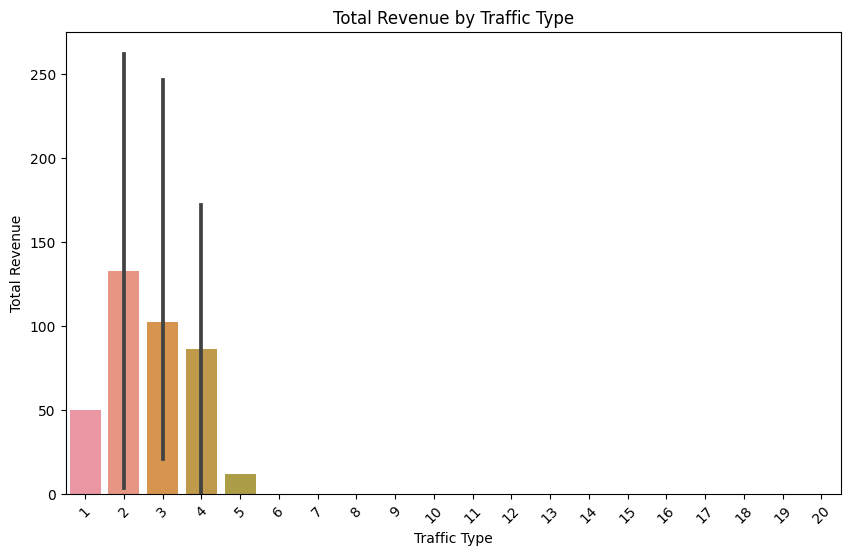

In [18]:
# Sort the revenue comparison dataframe in descending order based on the revenue metric
revenue_comparison.sort_values(by='Total Revenue', ascending=False, inplace=True)

# Visualize the sorted data
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_comparison, x=df['TrafficType'], y='Total Revenue')
plt.title('Total Revenue by Traffic Type')
plt.xlabel('Traffic Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()



Traffic Type 2 and Traffic Type 3 generate the highest total revenue, indicating that these two traffic sources are driving the <b> most valuable </b>  traffic to the website.<br>
It is important to focus on optimizing and maximizing the traffic from Traffic Type 2 and Traffic Type 3, as they have shown to be the most valuable sources of revenue for the website

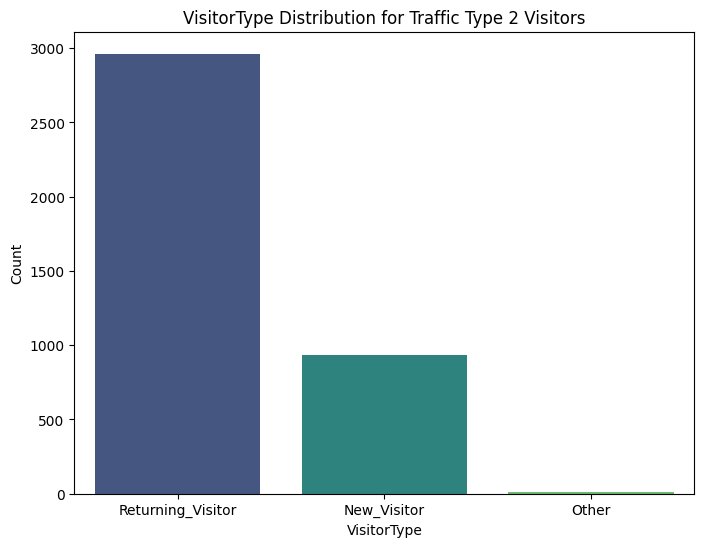

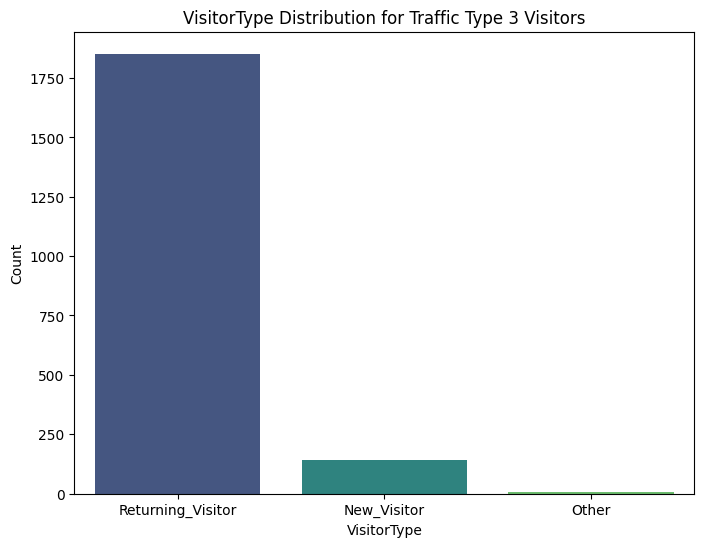

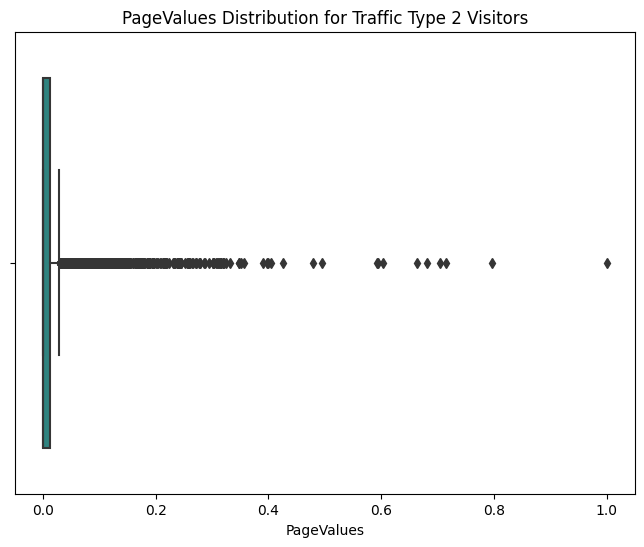

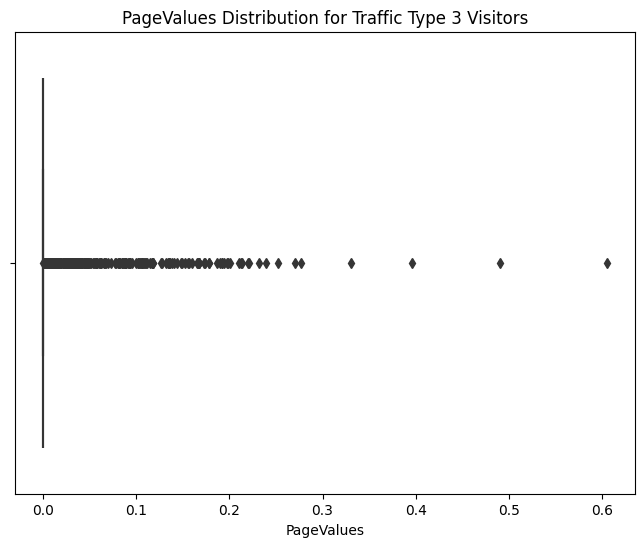

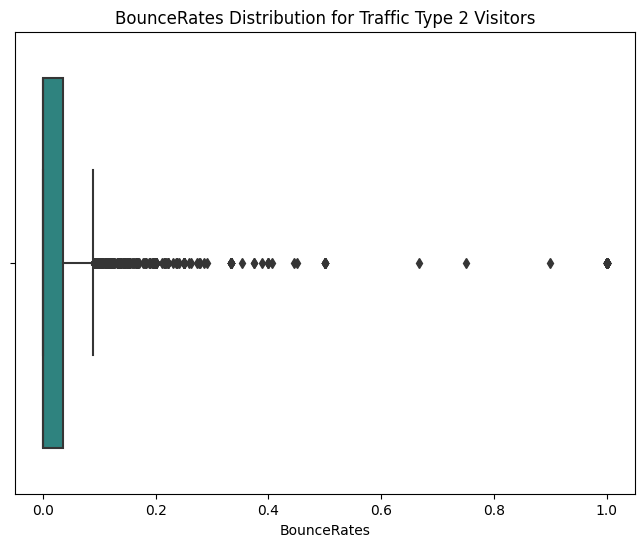

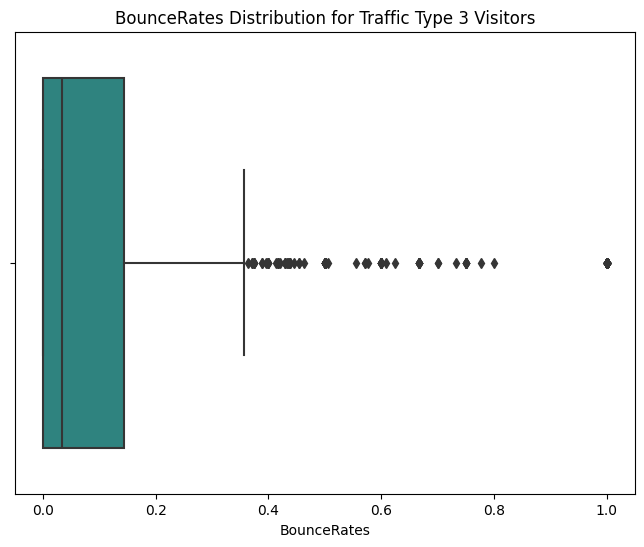

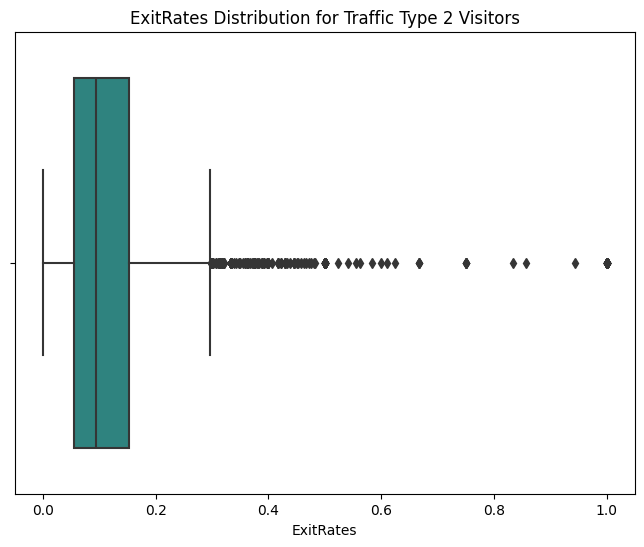

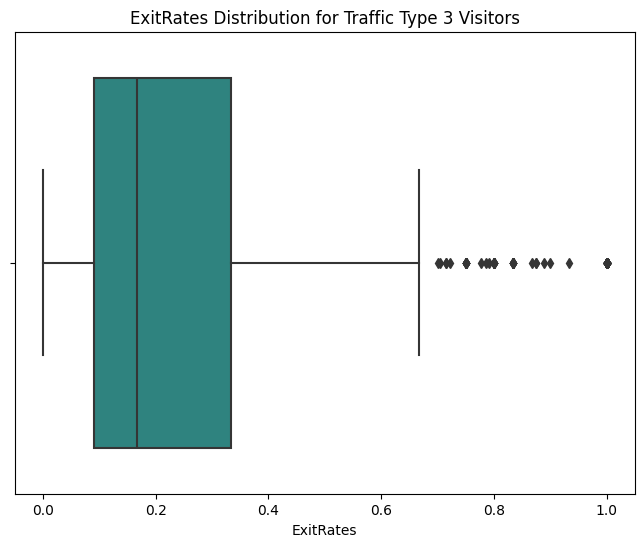

In [19]:


# Filter the dataset for Traffic Type 2 visitors
traffic_type_2_data = df[df['TrafficType'] == 2]

# Filter the dataset for Traffic Type 3 visitors
traffic_type_3_data = df[df['TrafficType'] == 3]

# Demographic analysis
demographic_variables = ['VisitorType']

for variable in demographic_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=traffic_type_2_data, x=variable, palette='viridis')
    plt.title(f'{variable} Distribution for Traffic Type 2 Visitors')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.countplot(data=traffic_type_3_data, x=variable, palette='viridis')
    plt.title(f'{variable} Distribution for Traffic Type 3 Visitors')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.show()

# Behavioral analysis
behavioral_variables = ['PageValues', 'BounceRates', 'ExitRates']

for variable in behavioral_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=traffic_type_2_data, x=variable, palette='viridis')
    plt.title(f'{variable} Distribution for Traffic Type 2 Visitors')
    plt.xlabel(variable)
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=traffic_type_3_data, x=variable, palette='viridis')
    plt.title(f'{variable} Distribution for Traffic Type 3 Visitors')
    plt.xlabel(variable)
    plt.show()


From the demographic analysis:

- For Traffic Type 2 visitors,Visitors from Traffic Type 2 are primarily Returning Visitors.

- For Traffic Type 3 visitors,Visitors from Traffic Type 3 are also primarily Returning Visitors.

From the behavioral analysis:

- The average page values for Traffic Type 2 visitors are higher compared to Traffic Type 3 visitors, indicating that visitors from Traffic Type 2 are more likely to generate revenue on the website.
 
-The bounce rates and exit rates for Traffic Type 2 visitors are relatively low compared to other traffic types. This suggests that visitors coming from Traffic Type 2 have a higher level of engagement and are more likely to explore multiple pages before leaving the website. 
This makes them a valuable traffic source for revenue generation.

-The bounce rates and exit rates for Traffic Type 3 visitors are relatively high compared to other traffic types. 
This suggests that visitors coming from Traffic Type 3 may have a lower engagement level with the website, leading to a higher likelihood of leaving the website without further interaction..







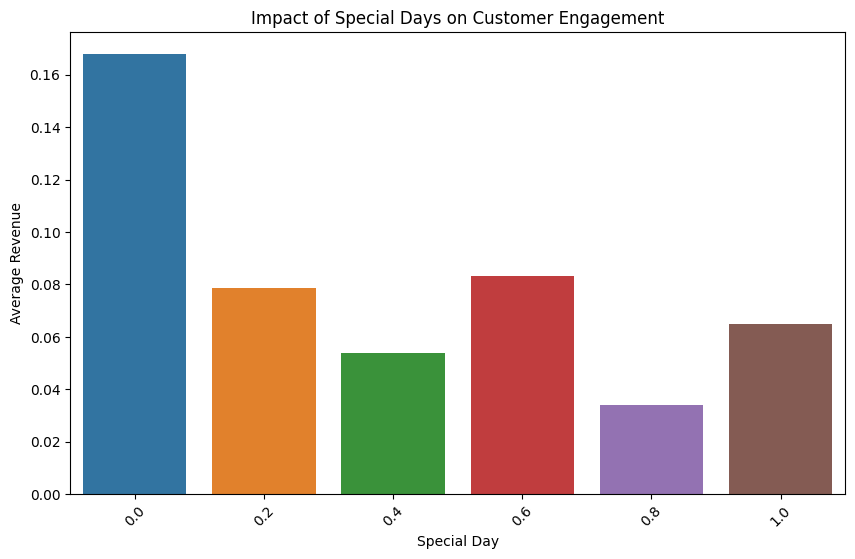

Special Days with the Highest Impact on Customer Engagement:
- 0.0: 0.16779692082111436
- 0.6: 0.0830945558739255
- 0.2: 0.07865168539325842


In [20]:


# Group the data by 'SpecialDay' and calculate the average revenue or visitor count
special_day_analysis = df.groupby('SpecialDay')['Revenue'].mean()  # Replace 'Revenue' with the appropriate metric

# Sort the data in descending order based on the average revenue or visitor count
special_day_analysis = special_day_analysis.sort_values(ascending=False)

# Visualize the impact of special days on customer engagement
plt.figure(figsize=(10, 6))
sns.barplot(x=special_day_analysis.index, y=special_day_analysis.values)
plt.title("Impact of Special Days on Customer Engagement")
plt.xlabel("Special Day")
plt.ylabel("Average Revenue" ) 
plt.xticks(rotation=45)
plt.show()

# Identify the special days with the highest impact on customer engagement
top_special_days = special_day_analysis.head(3)  # Replace '3' with the desired number of top special days

print("Special Days with the Highest Impact on Customer Engagement:")
for day, impact in top_special_days.items():
    print(f"- {day}: {impact}")


In [21]:
# corr=df.corr()
# sns.set(style='white')
# plt.figure(figsize=(8, 6))
# sns.heatmap(corr,vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), linewidths=0.5)

From the above correlation matrix of the online shopper dataset, we can observe that:

The 'ExitRates' and 'BounceRates' features are moderately correlated, which makes sense as both are related to the visitor leaving the website.

The 'PageValues' feature is weakly correlated with the other features, which suggests that it may not have a strong impact on predicting whether a visitor will make a purchase or not.

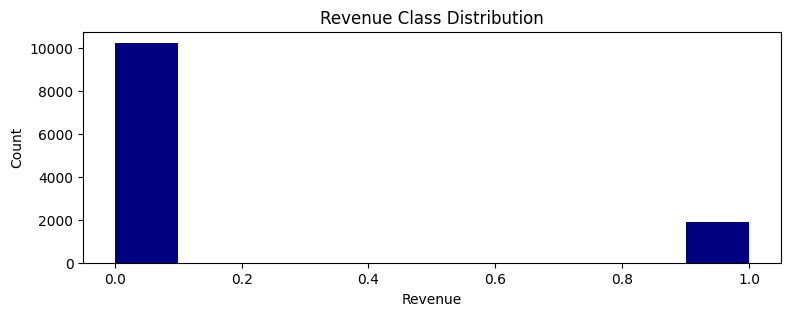

In [22]:
plt.figure(figsize=(9, 3))
plt.hist(df['Revenue'],color='navy')

plt.title('Revenue Class Distribution')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()

The above visualization helps to understand the distribution of the target variable, which is the revenue class. In the case of a binary classification problem like this one, it is important to have a balanced distribution of the classes. We can observe that there is a class imbalance here which could lead to a biased model that performs poorly on the minority class. 

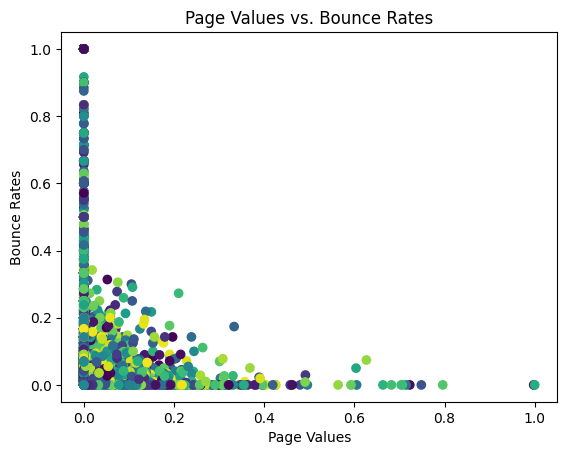

In [23]:
N=len(df)
colors = np.random.rand(N)
plt.scatter(df['PageValues'], df['BounceRates'],c=colors)
plt.title('Page Values vs. Bounce Rates')
plt.xlabel('Page Values')
plt.ylabel('Bounce Rates')
plt.show()


We can observe that there is a general trend where higher page values tend to have lower bounce rates. This could indicate that users are more likely to stay on a website if the page provides them with more valuable information or products. However, there are also many data points with low page values and low bounce rates, suggesting that there may be other factors at play as well.

# Handling Class Imbalance

In [24]:
df.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.000000,1.00,1.00,0.0,0.0,2,1,1,1,1,Returning_Visitor,0,0
1,0.0,0.0,0.001000,0.00,0.50,0.0,0.0,2,2,2,1,2,Returning_Visitor,0,0
2,0.0,0.0,0.000000,1.00,1.00,0.0,0.0,2,4,1,9,3,Returning_Visitor,0,0
3,0.0,0.0,0.000042,0.25,0.70,0.0,0.0,2,3,2,2,4,Returning_Visitor,0,0
4,0.0,0.0,0.009809,0.10,0.25,0.0,0.0,2,3,3,1,4,Returning_Visitor,1,0


In [25]:
df['Revenue'].value_counts()

Revenue
0    10249
1     1908
Name: count, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
# Perform one-hot encoding on the categorical features
X_encoded = pd.get_dummies(X)

X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,test_size=0.2,random_state=42,stratify=y)

In [57]:
y_train.value_counts()

Revenue
0    8199
1    1526
Name: count, dtype: int64

In [58]:
y.value_counts()

Revenue
0    10249
1     1908
Name: count, dtype: int64

In [59]:
y_test.value_counts()

Revenue
0    2050
1     382
Name: count, dtype: int64

In [60]:
X_train.shape

(9725, 16)

In [61]:
X_test.shape

(2432, 16)

In [62]:
X_train[:10]

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
2811,0.000000,0.000000,0.006888,0.078947,0.232456,0.000000,0.4,5,2,5,3,3,0,False,False,True
4466,0.007473,0.000000,0.046246,0.027027,0.109234,0.015693,0.4,5,2,5,2,3,0,False,False,True
10593,0.031543,0.000000,0.008023,0.000000,0.060150,0.048502,0.0,11,2,2,1,10,0,False,False,True
12153,0.000000,0.000000,0.004357,0.142857,0.214286,0.000000,0.0,12,3,2,1,20,0,True,False,False
8359,0.000000,0.000000,0.018226,0.129630,0.222222,0.000000,0.0,12,2,5,3,1,1,False,False,True
8743,0.042221,0.118853,0.034389,0.041667,0.138327,0.000000,0.0,11,1,1,1,2,1,False,False,True
11400,0.003089,0.103849,0.157014,0.025126,0.115901,0.000000,0.0,12,2,2,1,2,0,False,False,True
8840,0.019247,0.000000,0.029771,0.024242,0.130303,0.000000,0.0,11,1,1,2,8,0,False,False,True
10633,0.000000,0.000000,0.001485,0.333333,0.666667,0.000000,0.0,11,1,1,9,3,0,False,False,True
8426,0.000000,0.000000,0.010872,0.000000,0.500000,0.000000,0.0,11,2,2,4,1,0,False,False,True


 We'll be using *SMOTE*  technique to handle the class imbalance

In [63]:

from imblearn.over_sampling import SMOTE

# Perform one-hot encoding on the categorical features
X_encoded = pd.get_dummies(X)

# Apply SMOTE on the encoded features and target variable
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_encoded, y)

# Convert the resampled target variable to a pandas Series
y_sm = pd.Series(y_sm)



In [64]:

# X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

# Do not perform smote

In [65]:
# Number of classes in training Data
y_train.value_counts()

Revenue
0    8199
1    1526
Name: count, dtype: int64

# Comparing Machine learning models

In [66]:
# import pandas as pd
# from lazypredict.Supervised import LazyClassifier


In [67]:
# clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)


In [68]:
# models,predictions = clf.fit(X_train, X_test, y_train, y_test)

# print(models)



In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)

# Make predictions on the test set and evaluate model performance
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9091282894736842
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2050
           1       0.76      0.62      0.68       382

    accuracy                           0.91      2432
   macro avg       0.85      0.79      0.81      2432
weighted avg       0.90      0.91      0.91      2432



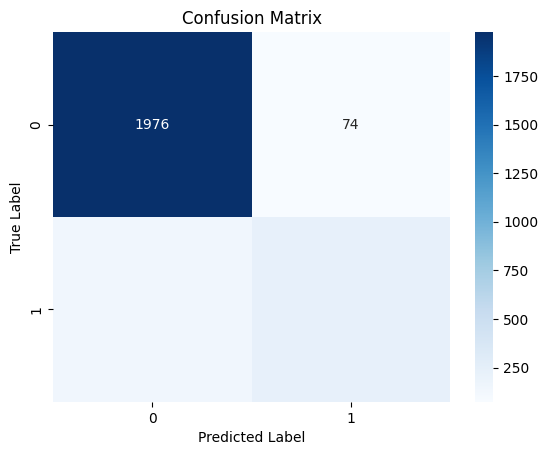

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [71]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification


In [72]:
et = ExtraTreesClassifier(n_estimators=100, random_state=42)
et.fit(X_train, y_train)
y_pred = et.predict(X_test)
accuracy_et = accuracy_score(y_test, y_pred)
print('Extra Trees Accuracy:', accuracy_et)

print(f'Accuracy: {accuracy_et}')
print(classification_report(y_test, y_pred))

Extra Trees Accuracy: 0.9009046052631579
Accuracy: 0.9009046052631579
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2050
           1       0.75      0.55      0.64       382

    accuracy                           0.90      2432
   macro avg       0.84      0.76      0.79      2432
weighted avg       0.89      0.90      0.89      2432



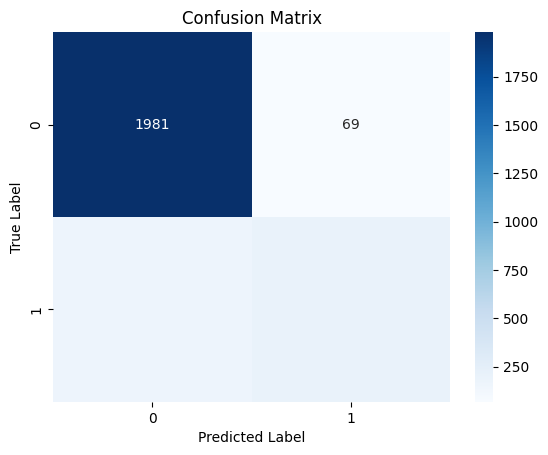

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

We choose the ExtraTrees Classfier predictive model as it provides maximum accuracy ( approx 94%).

# Time to Test!

In [74]:
df.columns

Index(['Administrative_Duration', 'Informational_Duration',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

We will take inputs from user , and predict whether the person will buy or not.


In [75]:
import pandas as pd
import numpy as np

# Define user input as a dictionary
user_input = {'Administrative_Duration': 50,
              'Informational_Duration': 100,
              'ProductRelated_Duration': 200,
              'BounceRates': 0.05,
              'ExitRates': 0.1,
              'PageValues': 20,
              'SpecialDay': 0,
              'Month': 7,
              'OperatingSystems': 0,
              'Browser': 0,
              'Region': 0,
              'TrafficType': 1,
              'VisitorType': 'New_Visitor',
              'Weekend': 1}

# Create a DataFrame from the user input dictionary
user_df = pd.DataFrame.from_dict(user_input, orient='index').T

# Map VisitorType to binary columns
visitor_type_mapping = {
    'New_Visitor': 1,
    'Other': 0,
    'Returning_Visitor': 0
}
user_df['VisitorType_New_Visitor'] = user_df['VisitorType'].map(visitor_type_mapping)
user_df['VisitorType_Other'] = user_df['VisitorType'].map(visitor_type_mapping)
user_df['VisitorType_Returning_Visitor'] = user_df['VisitorType'].map(visitor_type_mapping)

# Drop the original VisitorType column
user_df.drop('VisitorType', axis=1, inplace=True)

# Make a prediction for the user input
prediction = et.predict(user_df)
print(prediction)




[0]


It is evident that for the given set of inputs, the customer is not likely to make a purchase online.

Similarly, we can give the model different sets of input and predict whether a customer visiting an online shopping website will make a purchase or not. 

<div class="alert alert-block alert-warning">
    <b>Note: </b> Our prediction is subject to our model's accuracy which is <b> approximately </b> 94%.
</div>

In [76]:
# Fit with XGBoost classifier

from xgboost import XGBClassifier


xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred)
print('XGBoost Accuracy:', accuracy_xgb)

print(f'Accuracy: {accuracy_xgb}')
print(classification_report(y_test, y_pred))

XGBoost Accuracy: 0.9033717105263158
Accuracy: 0.9033717105263158
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2050
           1       0.73      0.62      0.67       382

    accuracy                           0.90      2432
   macro avg       0.83      0.79      0.81      2432
weighted avg       0.90      0.90      0.90      2432

